# Проект: Линейные модели в машинном обучении.
# Описание проекта.

Мы IT-компания, которая выполняет обратился фермер, владелец  бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок! Фермер просит разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах.

**Цель:**

Создать две прогнозные модели для отбора бурёнок в поголовье:

- первая будет прогнозировать возможный удой коровы (целевой признак Удой);

- вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

С помощью модели нужно отобрать коров по двум критериям:

- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.

**Описание данных:**

Даны три датасета:

- ferma_main.csv
- ferma_dad.csv
- cow_buy.csv

Файл *ferma_main.csv* содержит данные о стаде фермера на текущий момент:

- id — уникальный идентификатор коровы.
- Удой, кг — масса молока, которую корова даёт в год (в килограммах).
- ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
- Сырой протеин, г — содержание сырого протеина в корме (в граммах).
- СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Жирность,% — содержание жиров в молоке (в процентах).
- Белок,% — содержание белков в молоке (в процентах).
- Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Признаки в датасете *ferma_main.csv* можно разделить на группы:

- Характеристики коровы: id, Порода, порода папы_быка, Возраст.
- Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
- Характеристика пастбища: Тип пастбища.
- Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.

Такое разделение поможет понять, как взаимосвязаны признаки в датасете.

Файл *ferma_dad.csv* хранит имя папы каждой коровы в стаде фермера:

- id — уникальный идентификатор коровы.
- Имя Папы — имя папы коровы.

Файл *cow_buy.csv* — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой:

- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Имя_папы — имя папы коровы.
- Текущая_жирность,% — содержание жиров в молоке (в процентах).
- Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей.
Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%. Кроме того, отсутствуют признаки Удой, кг и Вкус молока.

**План работы:**

1. Подготовить данные.
2. Провести исследовательский анализ данных.
3. Провести корреляционный анализ.
4. Обучить модель линейной регрессии.
5. Обучить модель логистической регрессии.
6. Сделать вывод.



# 1. Загрузка данных.

In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as st
import re
import scipy.stats as stats


from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder 
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [3]:
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep = ';', decimal = ",")
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep = ';', decimal = ",")
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep = ';', decimal = ",")

In [4]:
def check_df(df):    
    display(df.info())   
    display(df.head())

In [5]:
check_df(ferma_main)
check_df(ferma_dad)
check_df(cow_buy)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

None

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


None

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


**Вывод:** на первых взгляд в полученных данных нет пропусков. Нет единого регистра в названиях столбцов. Тип данных везде верный.

# 2.  Предобработка данных.

##  2.1 Приведем названия колонок к едиообразию  и изменим тип данных.

Так как названия колонок русские, то для единообразия в названиях сделаем первую букву заглавной, уберем нижнее подчеркивание, оставим пробелы, удалим расшифровку аббревиатур(слишком массивное название колонок с расшифровкой). В файле cow_buy переименует Текущая жирность и Текущий уровень белок в Жирность и Белок соответсвенно. 

In [6]:
ferma_main.columns = [re.sub(r'[^а-яА-Яa-z()\s]+', '', i).lower() for i in ferma_main]
ferma_main.head()

,id,удой кг,эке (энергетическая кормовая единица),сырой протеин г,спо (сахаропротеиновое соотношение),порода,тип пастбища,порода папыбыка,жирность,белок,вкус молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [7]:
ferma_main.rename(columns={'эке (энергетическая кормовая единица)':'эке',
                          'спо (сахаропротеиновое соотношение)':'cпо',
                           'порода папыбыка':'порода папы быка',
                          'удой кг':'удой',
                          'сырой протеин г':'сырой протеин'}, inplace=True)
ferma_main.head()

,id,удой,эке,сырой протеин,cпо,порода,тип пастбища,порода папы быка,жирность,белок,вкус молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [8]:
ferma_main.columns = ferma_main.columns.str.replace(' ', '_')
ferma_main.head()

,id,удой,эке,сырой_протеин,cпо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [9]:
ferma_dad.columns = ferma_dad.columns.str.replace(' ','_').str.lower()
ferma_dad.head()

,id,имя_папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [10]:
cow_buy.columns = cow_buy.columns.str.replace(' ','_').str.lower()
cow_buy.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [11]:
cow_buy.rename(columns={
    'текущая_жирность,%':'жирность',
    'текущий_уровень_белок,%':'белок'}, inplace=True)
cow_buy.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


## 2.2 Проверим наличие дубликатов  и пропусков.

In [12]:
def check_df1(df):
    display(df.isna().sum())   
    display(df.duplicated().sum())

In [13]:
check_df1(ferma_main)
check_df1(ferma_dad)
check_df1(cow_buy)

id                  0
удой                0
эке                 0
сырой_протеин       0
cпо                 0
порода              0
тип_пастбища        0
порода_папы_быка    0
жирность            0
белок               0
вкус_молока         0
возраст             0
dtype: int64

5

id          0
имя_папы    0
dtype: int64

0

порода              0
тип_пастбища        0
порода_папы_быка    0
имя_папы            0
жирность            0
белок               0
возраст             0
dtype: int64

4

Пропусков в данных нет, есть явные дубликаты в ferma_main и cow_buy. Проверим неявные дубликаты в ferma_main.

In [14]:
ferma_main['порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

Неявных дубликатов нет, но изменим РефлешнСоверинг на Рефлешн Соверинг для единообразия в названии пород. 

In [15]:
ferma_main['порода'] = ferma_main['порода'].str.replace('РефлешнСоверинг', 'Рефлешн Соверинг')
ferma_main['порода'].unique()

array(['Вис Бик Айдиал', 'Рефлешн Соверинг'], dtype=object)

In [16]:
ferma_main['тип_пастбища'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

Очевидно, что Равнинное и Равнинные один тип пастбища. Изменим Равнинные на Равнинное.

In [17]:
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].str.replace('Равнинные', 'Равнинное')
ferma_main['тип_пастбища'].unique()

array(['Равнинное', 'Холмистое'], dtype=object)

In [18]:
ferma_main['порода_папы_быка'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

Ошибка в написании породы Айдиал. Изменим Айдиалл на Айдиал.

In [19]:
ferma_main['порода_папы_быка'] = ferma_main['порода_папы_быка'].str.replace('Айдиалл', 'Айдиал')
ferma_main['порода_папы_быка'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [20]:
ferma_main['вкус_молока'].unique()

array(['вкусно', 'не вкусно'], dtype=object)

In [21]:
ferma_main['возраст'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

Уберем нижнее подчеркивание.

In [22]:
ferma_main = ferma_main.replace({'возраст':{'более_2_лет':'более 2 лет',
                                          'менее_2_лет':'менее 2 лет'}})
ferma_main['возраст'].unique()

array(['более 2 лет', 'менее 2 лет'], dtype=object)

В остальных колонках исправлений не требуется. Проверим строки неявных дубликатов и удалим их.

In [23]:
display(ferma_main[ferma_main.duplicated(subset=['id','эке','порода'])])

,id,удой,эке,сырой_протеин,cпо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
629,627,5970,14.4,1837,0.88,Рефлешн Соверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более 2 лет
630,627,5970,14.4,1837,0.88,Рефлешн Соверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более 2 лет
631,627,5970,14.4,1837,0.88,Рефлешн Соверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более 2 лет
632,627,5970,14.4,1837,0.88,Рефлешн Соверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более 2 лет
633,627,5970,14.4,1837,0.88,Рефлешн Соверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более 2 лет


In [24]:
ferma_main = ferma_main.drop_duplicates(subset=['id','эке','порода'])

In [25]:
ferma_main .duplicated().sum()

0

Проверим неявные дубликаты в ferma_dad.

In [26]:
ferma_dad['имя_папы'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

С имена пап все в порядке. Явных дубликатов нет. Перейдем к следующему датасету. Проверим неявные дубликаты в cow_buy.

In [27]:
cow_buy['порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

Также изменим РефлешнСоверинг на Рефлешн Соверинг.

In [28]:
cow_buy['порода'] = cow_buy['порода'].str.replace('РефлешнСоверинг', 'Рефлешн Соверинг')
cow_buy['порода'].unique()

array(['Вис Бик Айдиал', 'Рефлешн Соверинг'], dtype=object)

In [29]:
cow_buy['тип_пастбища'].unique()

array(['холмистое', 'равнинное'], dtype=object)

Изменим первую строчную букву на заглавную.

In [30]:
cow_buy = cow_buy.replace({'тип_пастбища':{'холмистое':'Холмистое',
                                          'равнинное':'Равнинное'}})
cow_buy['тип_пастбища'].unique()

array(['Холмистое', 'Равнинное'], dtype=object)

In [31]:
cow_buy['порода_папы_быка'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [32]:
cow_buy['имя_папы'].unique()

array(['Геркулес', 'Буйный', 'Барин', 'Соловчик'], dtype=object)

In [33]:
cow_buy['возраст'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

Уберем нижнее подчеркивание.

In [34]:
cow_buy = cow_buy.replace({'возраст':{'более_2_лет':'более 2 лет',
                                          'менее_2_лет':'менее 2 лет'}})
cow_buy['возраст'].unique()

array(['более 2 лет', 'менее 2 лет'], dtype=object)

 В cow_buy 4 явных дубликата. Проверим.

In [35]:
display(cow_buy[cow_buy.duplicated()])

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет
8,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,более 2 лет
14,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,более 2 лет
19,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более 2 лет


По какой-то причине мы видим, что дубликатов всего 2, а не 4. Строки 6 и 19 явно отличаются. В таком случае удалим только строку 8 и 14. 

In [36]:
cow_buy = cow_buy.drop(index=[8, 14])

In [37]:
cow_buy.head(20)

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее 2 лет
2,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,более 2 лет
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более 2 лет
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более 2 лет
5,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее 2 лет
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более 2 лет
9,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее 2 лет
10,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,более 2 лет


Так как датасет не большой, убедились, что строки 8 и 14 удалены.

**Вывод:** на данном этапе изменили названия колонок, изменили тип данных. Нашли, удалили и обработали явные и неявные дубликаты. Пропуски не обнаружили.

# 3. Исследовательский анализ данных

Проведем статистический анализ всех количественных и качественных признаков.
Построим графики для каждого признака.

## 3.1 Проведем анализ датасета ferma_main.

In [38]:
ferma_main.describe()

,id,удой,эке,сырой_протеин,cпо,жирность,белок
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


В данных виден выброс в максимальном значении удоя  - больше чем 45 600 кг для одной коровы, явно это ошибка данных. Построим диаграммы рассеивания с выбросами и без.

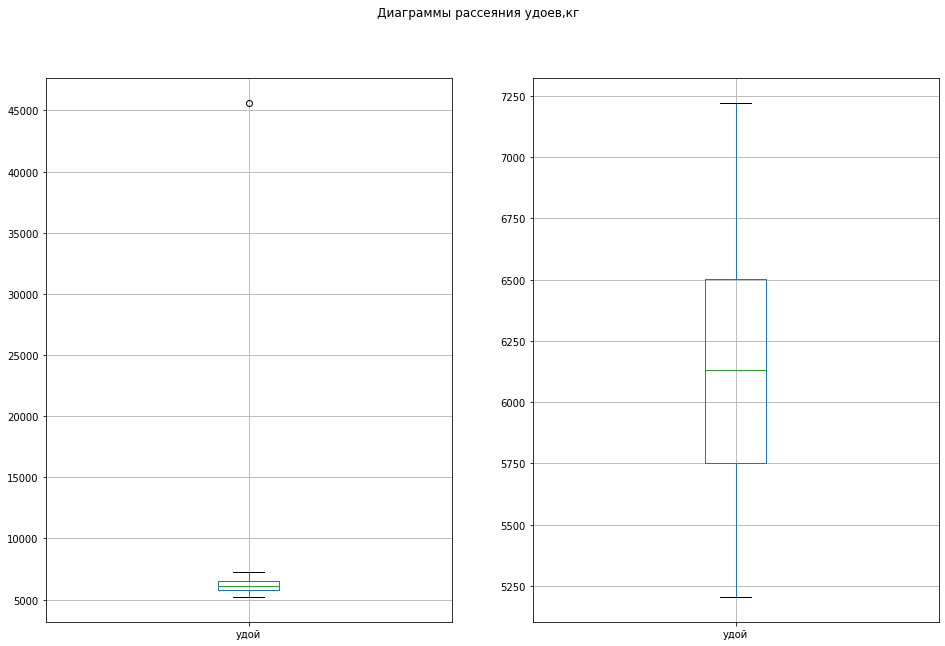

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(16, 10))
ferma_main.boxplot(column='удой', ax=axes[0])
ferma_main.boxplot(column='удой', showfliers=False, ax=axes[1])

plt.suptitle('Диаграммы рассеяния удоев,кг')
plt.show()

Одно значение сильно выбивается из данных. Удалим его.

In [40]:
ferma_main = ferma_main[ferma_main['удой'] < 8000]

In [41]:
ferma_main.describe()

,id,удой,эке,сырой_протеин,cпо,жирность,белок
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000
mean,315.474522,6125.968153,14.548726,1923.759554,0.913089,3.604268,3.075670
std,181.475367,475.857053,1.301777,182.832816,0.032221,0.168093,0.002551
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.750000,5749.750000,13.500000,1771.750000,0.890000,3.590000,3.074000
50%,315.500000,6132.500000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.250000,6501.000000,15.600000,2062.250000,0.940000,3.720000,3.077000
max,629.000000,7222.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


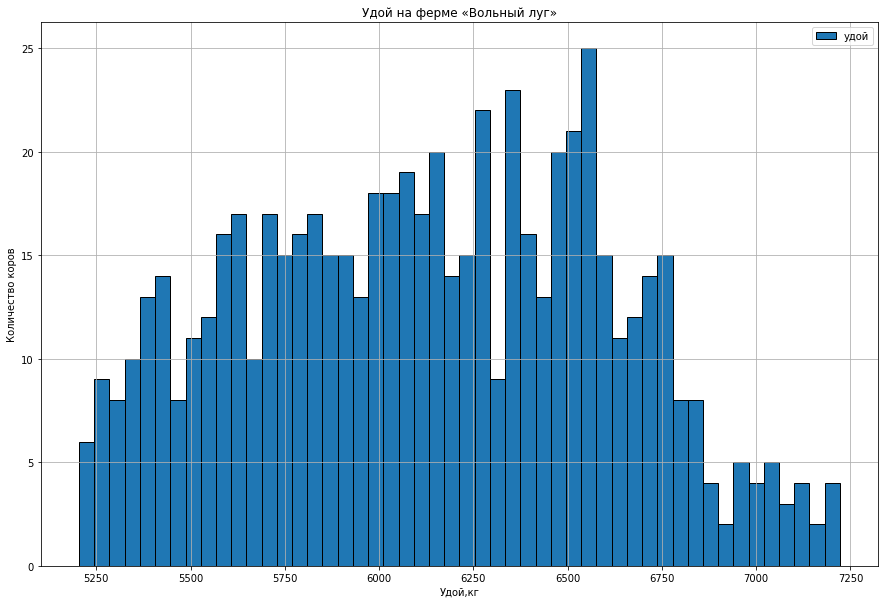

In [42]:
ferma_main['удой'].hist(bins=50, figsize=(15,10),legend=True, ec='black')
plt.title('Удой на ферме «Вольный луг»')
plt.xlabel('Удой,кг')
plt.ylabel('Количество коров')
plt.show()

Большая часть коров дает удой в примерном диапазоне от 5200 до 6800 кг. Есть коровы, которые дают больше 7000 кг, но таких гораздо меньше. Распределение стремится к нормальному. 

Построим график и диаграмму по показателю ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.

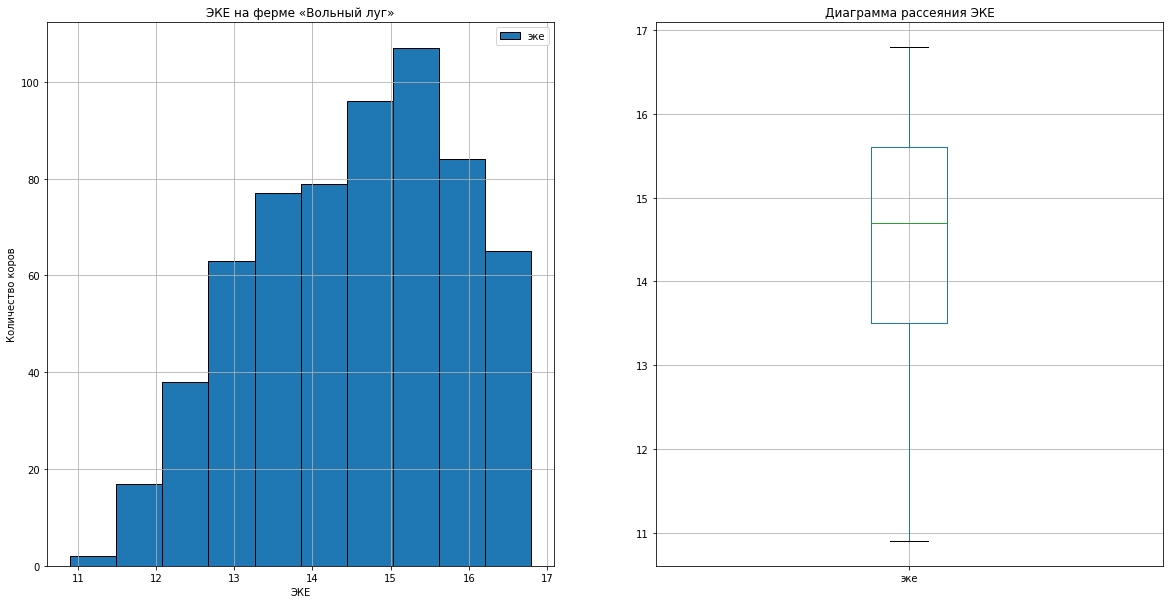

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
ferma_main['эке'].hist(bins=10,legend=True, ec='black', ax=axes[0])
ferma_main.boxplot(column='эке', ax=axes[1])

axes[0].set_title('ЭКЕ на ферме «Вольный луг»')
axes[0].set_xlabel('ЭКЕ')
axes[0].set_ylabel('Количество коров')
axes[1].set_title('Диаграмма рассеяния ЭКЕ')

plt.show()

У большинства коров показатель питательности ЭКЕ находится в диапазоне от 13 до 16. Выбросов не наблюдается. 
Распределение с отклонением влево.

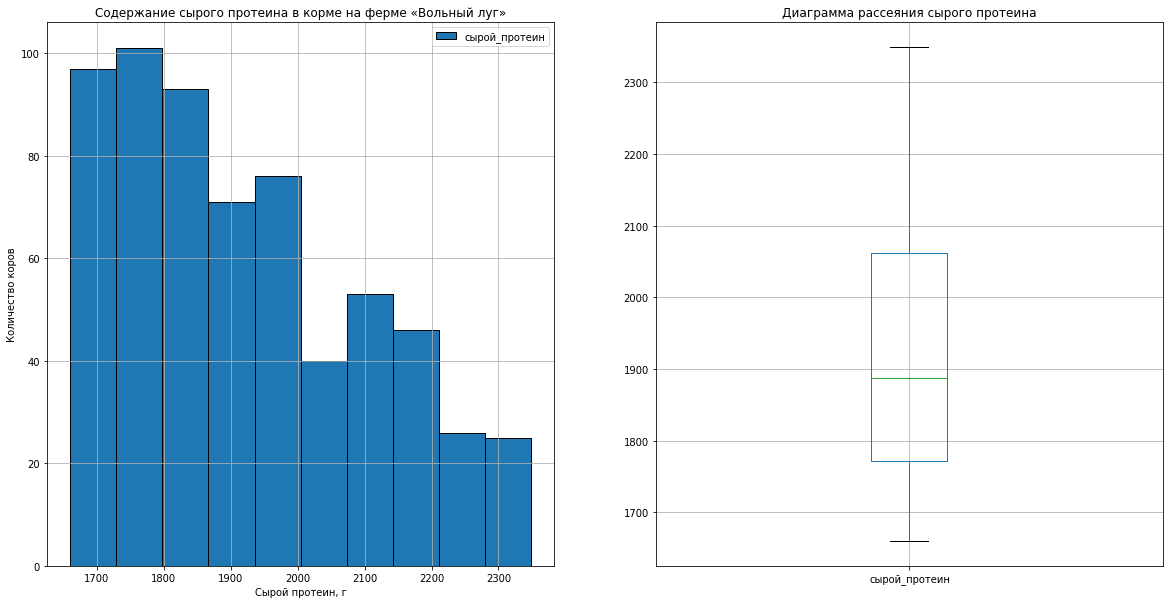

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
ferma_main['сырой_протеин'].hist(bins=10,legend=True, ec='black', ax=axes[0])
ferma_main.boxplot(column='сырой_протеин', ax=axes[1])

axes[0].set_title('Содержание сырого протеина в корме на ферме «Вольный луг»')
axes[0].set_xlabel('Сырой протеин, г')
axes[0].set_ylabel('Количество коров')
axes[1].set_title('Диаграмма рассеяния сырого протеина')

plt.show()

У большинства коров содержание сырого протеина в корме находится в диапазоне от 1660 до 2000 г. Выбросов не наблюдается. Распределение с отклонением вправо.

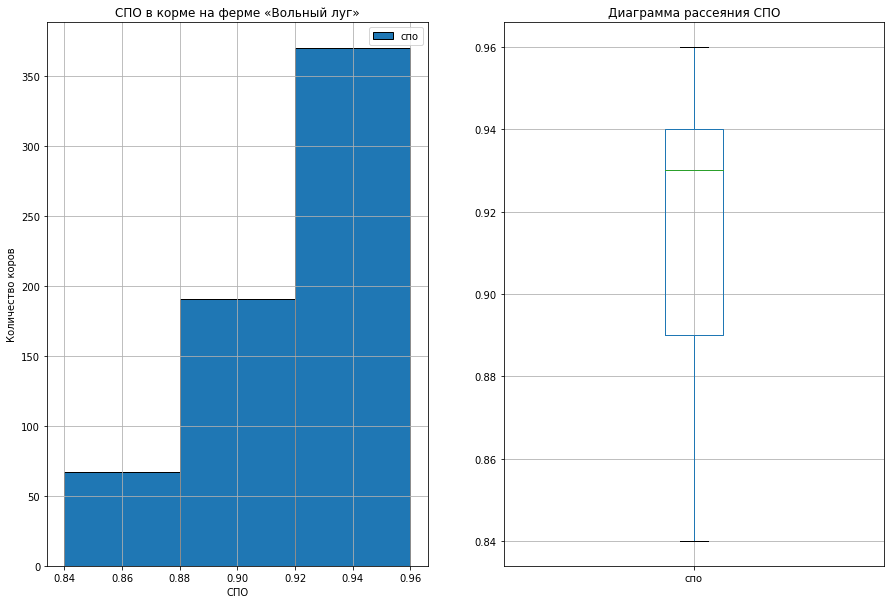

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
ferma_main['cпо'].hist(bins=3,legend=True, ec='black', ax=axes[0])
ferma_main.boxplot(column='cпо', ax=axes[1])

axes[0].set_title('СПО в корме на ферме «Вольный луг»')
axes[0].set_xlabel('СПО')
axes[0].set_ylabel('Количество коров')
axes[1].set_title('Диаграмма рассеяния СПО')

plt.show()

СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы находится в диапазоне от 0.84 до 096. Выбросов не наблюдается. Распределение с отклонением влево.

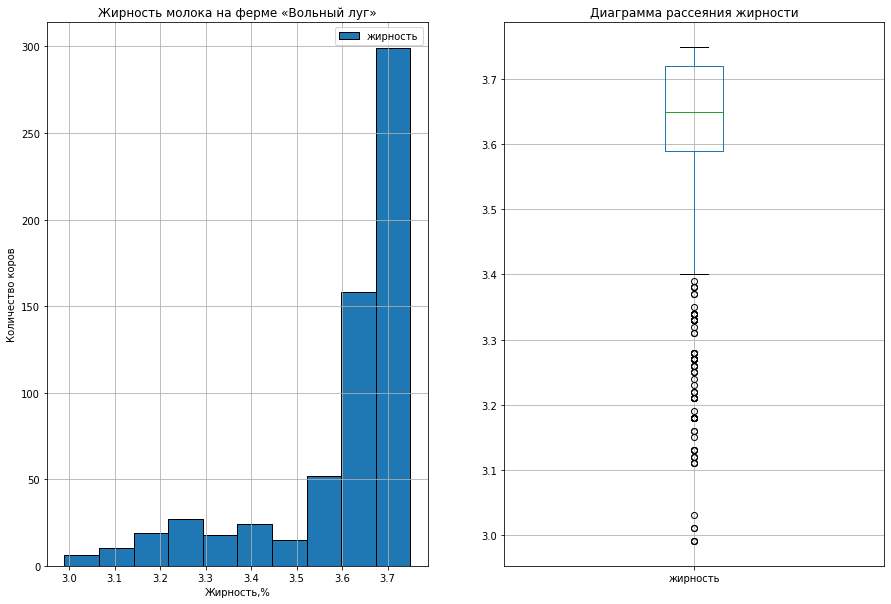

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
ferma_main['жирность'].hist(bins=10,legend=True, ec='black', ax=axes[0])
ferma_main.boxplot(column='жирность', ax=axes[1])

axes[0].set_title('Жирность молока на ферме «Вольный луг»')
axes[0].set_xlabel('Жирность,%')
axes[0].set_ylabel('Количество коров')
axes[1].set_title('Диаграмма рассеяния жирности')

plt.show()

Жирность молока у большинства коров высокая - 3,7%. Также есть коровы, жирность молока которых ниже, но не опускается ниже 3 %. Диаграмма рассеяния показывает, что есть выбросы. Минимальное значение жирности - 2,9%, первый квартиль 3,59%. Разница не большая. Оставим данные как есть. Распределение с отклонением влево.

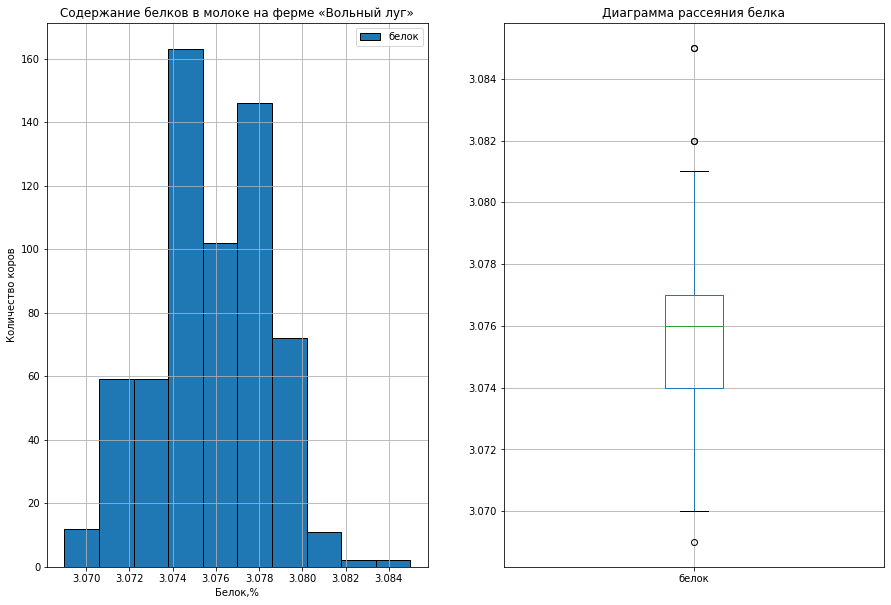

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
ferma_main['белок'].hist(bins=10,legend=True, ec='black', ax=axes[0])
ferma_main.boxplot(column='белок', ax=axes[1])

axes[0].set_title('Содержание белков в молоке на ферме «Вольный луг»')
axes[0].set_xlabel('Белок,%')
axes[0].set_ylabel('Количество коров')
axes[1].set_title('Диаграмма рассеяния белка')

plt.show()

Содержание белков в молоке у всех коров почти одинаковое, отличаются только тысячные %. Также есть несколько выбросов, но не будем удалять их. Распределение ближе к нормальному.

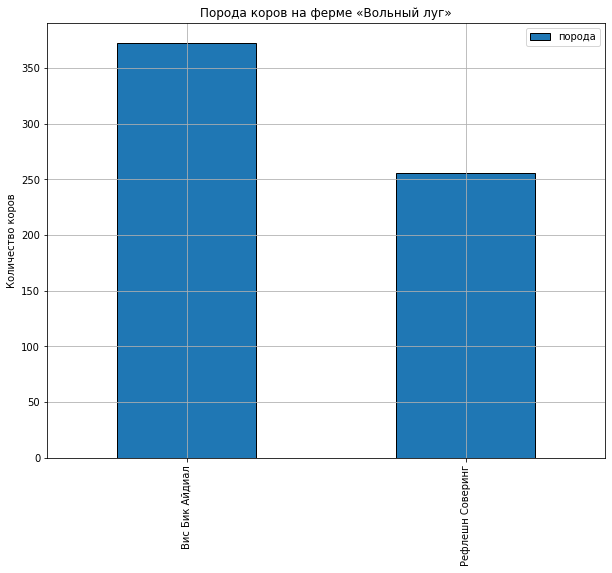

In [48]:
ferma_main['порода'].value_counts().plot.bar(figsize=(10, 8), ec='black', legend=True, grid=True)
plt.title('Порода коров на ферме «Вольный луг»')
plt.ylabel('Количество коров')
plt.show()

In [49]:
ferma_main['порода'].value_counts()

Вис Бик Айдиал      372
Рефлешн Соверинг    256
Name: порода, dtype: int64

Количество коров породы Вис Бик Айдиал составляет 373 головы. Разница с породой Рефлешн в 117 коров.

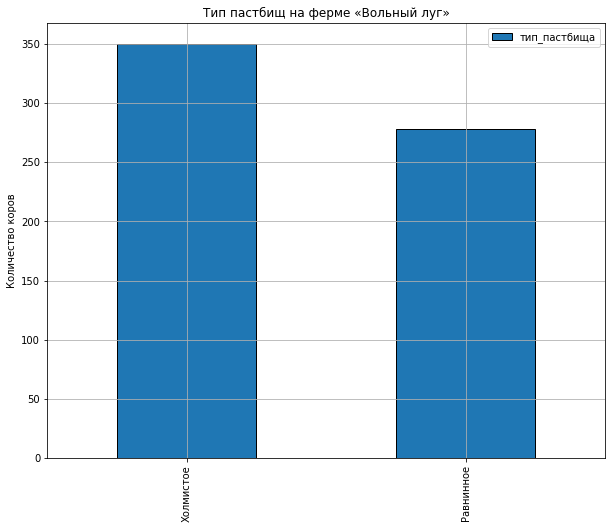

In [50]:
ferma_main['тип_пастбища'].value_counts().plot.bar(figsize=(10, 8), ec='black', legend=True, grid=True)
plt.title('Тип пастбищ на ферме «Вольный луг»')
plt.ylabel('Количество коров')
plt.show()

In [51]:
ferma_main['тип_пастбища'].value_counts()

Холмистое    350
Равнинное    278
Name: тип_пастбища, dtype: int64

Преобладает выгул на холмистом типе пастбищ, но отрыв от равнинного типа не большой, всего на 73 коровы больше.

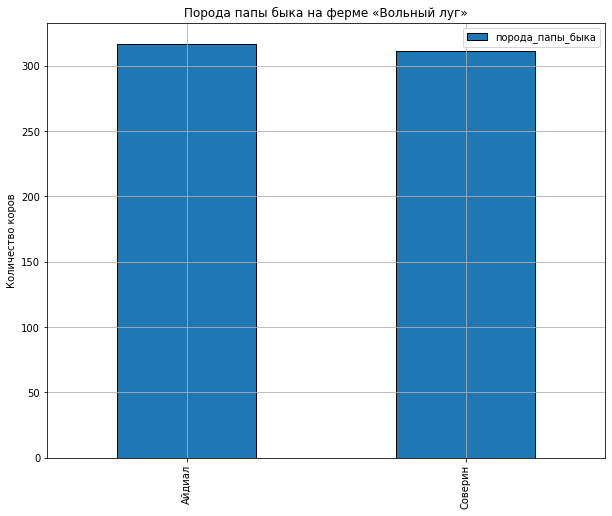

In [52]:
ferma_main['порода_папы_быка'].value_counts().plot.bar(figsize=(10, 8), ec='black', legend=True, grid=True)
plt.title('Порода папы быка на ферме «Вольный луг»')
plt.ylabel('Количество коров')
plt.show()

In [53]:
ferma_main['порода_папы_быка'].value_counts()

Айдиал     317
Соверин    311
Name: порода_папы_быка, dtype: int64

Соотношение пород пап быка почти одинаковое.

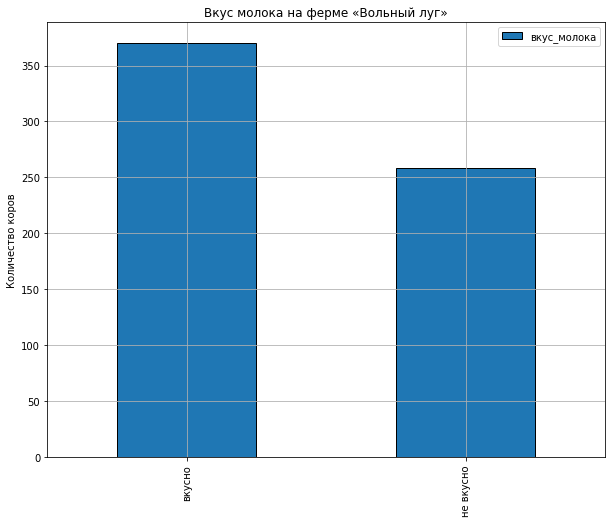

In [54]:
ferma_main['вкус_молока'].value_counts().plot.bar(figsize=(10, 8), ec='black', legend=True, grid=True)
plt.title('Вкус молока на ферме «Вольный луг»')
plt.ylabel('Количество коров')
plt.show()

In [55]:
ferma_main['вкус_молока'].value_counts()

вкусно       370
не вкусно    258
Name: вкус_молока, dtype: int64

Вкус молока у большинтсва коров оценивается как вкусное, но много коров, вкус молока которых не вкусное.

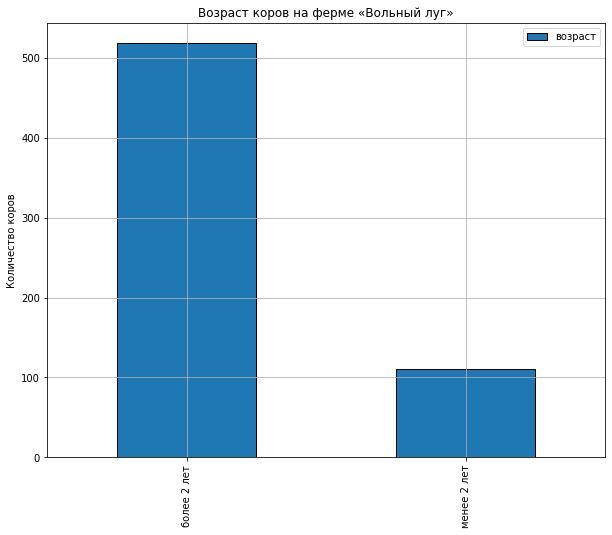

In [56]:
ferma_main['возраст'].value_counts().plot.bar(figsize=(10, 8), ec='black', legend=True, grid=True)
plt.title('Возраст коров на ферме «Вольный луг»')
plt.ylabel('Количество коров')
plt.show()

In [57]:
ferma_main['возраст'].value_counts()

более 2 лет    518
менее 2 лет    110
Name: возраст, dtype: int64

Всего 110 коров моложе 2-х лет, все остальные старше.

## 3.2 Проведем анализ датасета ferma_dad.

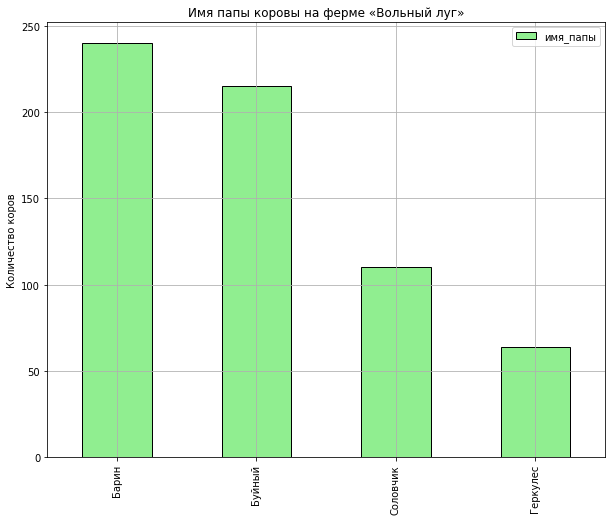

In [58]:
ferma_dad['имя_папы'].value_counts().plot.bar(figsize=(10, 8), ec='black', legend=True, grid=True, color='Lightgreen')
plt.title('Имя папы коровы на ферме «Вольный луг»')
plt.ylabel('Количество коров')
plt.show()

In [59]:
ferma_dad['имя_папы'].value_counts()

Барин       240
Буйный      215
Соловчик    110
Геркулес     64
Name: имя_папы, dtype: int64

Папа бык по кличке Барин имеет больше всех детей(коров) в количестве 240, чуть меньше у быка Буйный - 215, у быка Словчик 110, у Геркулеса 64. 

## 3.3 Проведем анализ датасета cow_buy.

In [60]:
cow_buy.describe()

,жирность,белок
count,18.000000,18.000000
mean,3.576111,3.069000
std,0.133995,0.010808
min,3.340000,3.046000
25%,3.450000,3.062000
50%,3.585000,3.074000
75%,3.670000,3.076000
max,3.770000,3.081000


Выбиющихся значений не наблюдается.

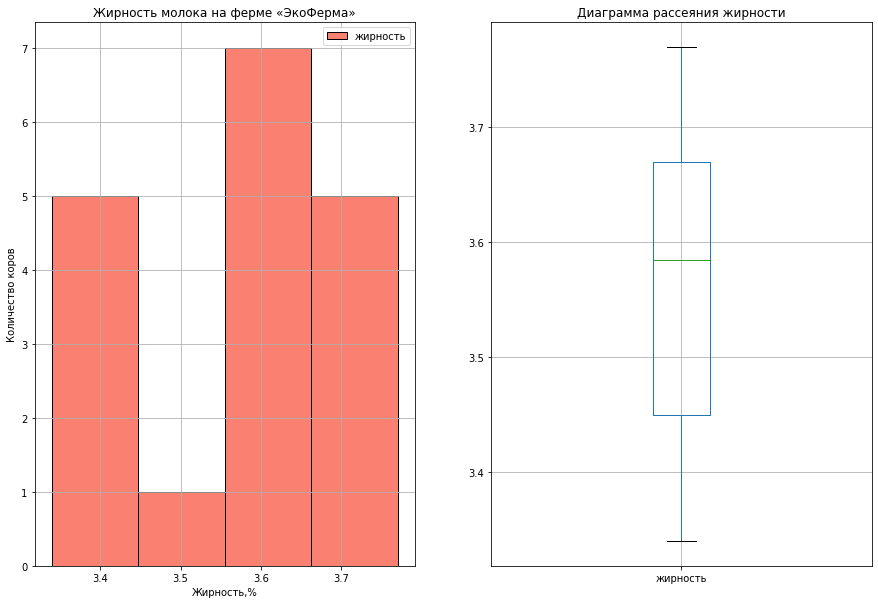

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
cow_buy['жирность'].hist(bins=4,legend=True, ec='black', color='Salmon', ax=axes[0])
cow_buy.boxplot(column='жирность', ax=axes[1])

axes[0].set_title('Жирность молока на ферме «ЭкоФерма»')
axes[0].set_xlabel('Жирность,%')
axes[0].set_ylabel('Количество коров')
axes[1].set_title('Диаграмма рассеяния жирности')

plt.show()

Жирность молока у коров колеблется в диапазоне от 3,4 до 3,7%. Выбросов нет.

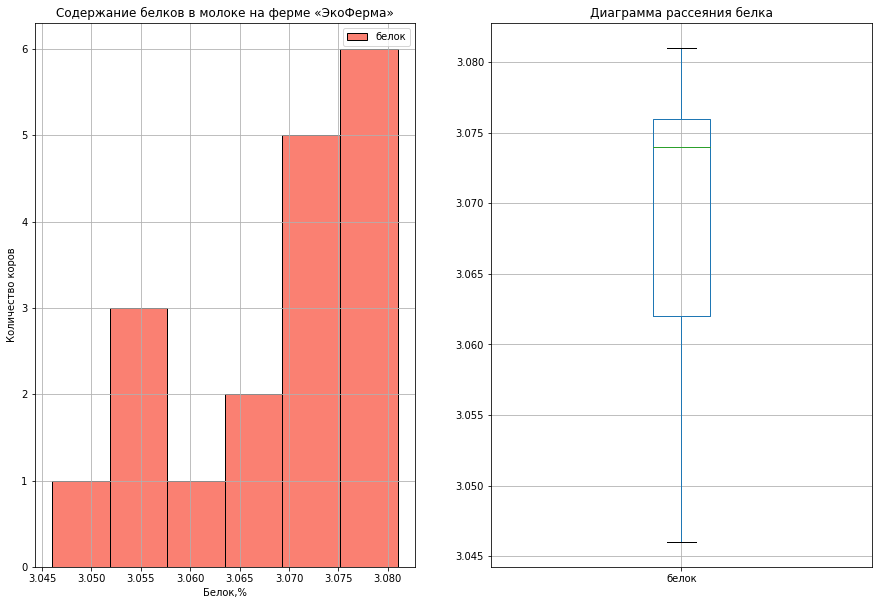

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
cow_buy['белок'].hist(bins=6,legend=True, ec='black', color='Salmon', ax=axes[0])
cow_buy.boxplot(column='белок', ax=axes[1])

axes[0].set_title('Содержание белков в молоке на ферме «ЭкоФерма»')
axes[0].set_xlabel('Белок,%')
axes[0].set_ylabel('Количество коров')
axes[1].set_title('Диаграмма рассеяния белка')

plt.show()

Разница в содержании белков в молоке на ЭкоФерме отличается сотые и тысячные %. В целом содержание белков одинаковое. Выбросов нет.

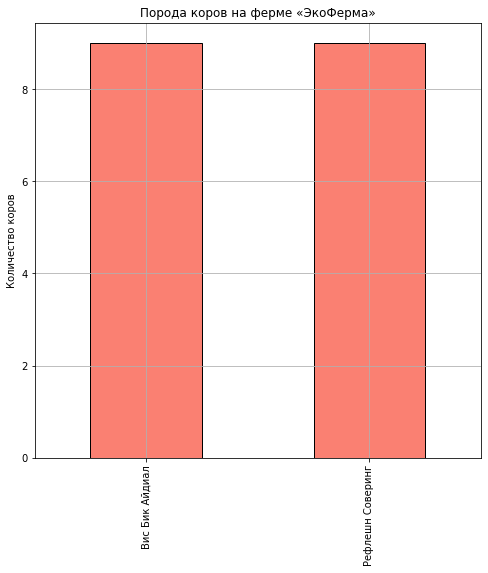

In [63]:
cow_buy['порода'].value_counts().plot.bar(figsize=(8, 8), ec='black', grid=True, color='Salmon')
plt.title('Порода коров на ферме «ЭкоФерма»')
plt.ylabel('Количество коров')
plt.show()

In [64]:
cow_buy['порода'].value_counts()

Вис Бик Айдиал      9
Рефлешн Соверинг    9
Name: порода, dtype: int64

Пород коров на ЭкоФерме одинаковое количество.

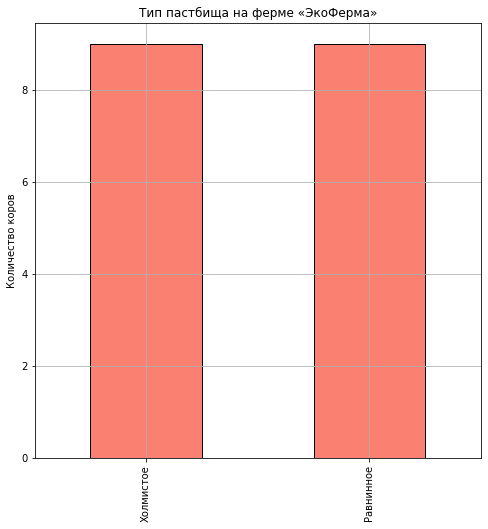

In [65]:
cow_buy['тип_пастбища'].value_counts().plot.bar(figsize=(8, 8), ec='black', grid=True, color='Salmon')
plt.title('Тип пастбища на ферме «ЭкоФерма»')
plt.ylabel('Количество коров')
plt.show()

In [66]:
cow_buy['тип_пастбища'].value_counts()

Холмистое    9
Равнинное    9
Name: тип_пастбища, dtype: int64

Тип пастбищ на ЭкоФерме одинаковое количество.

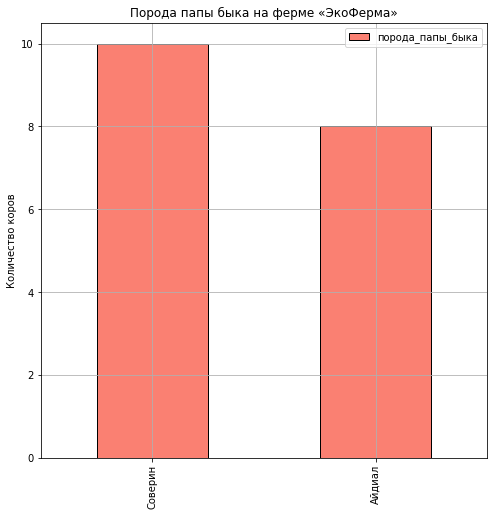

In [67]:
cow_buy['порода_папы_быка'].value_counts().plot.bar(figsize=(8, 8), ec='black', legend=True, grid=True, color='Salmon')
plt.title('Порода папы быка на ферме «ЭкоФерма»')
plt.ylabel('Количество коров')
plt.show()

In [68]:
cow_buy['порода_папы_быка'].value_counts()

Соверин    10
Айдиал      8
Name: порода_папы_быка, dtype: int64

Порода папы быка Соверин на 2 головы больше, чем Айдиал.

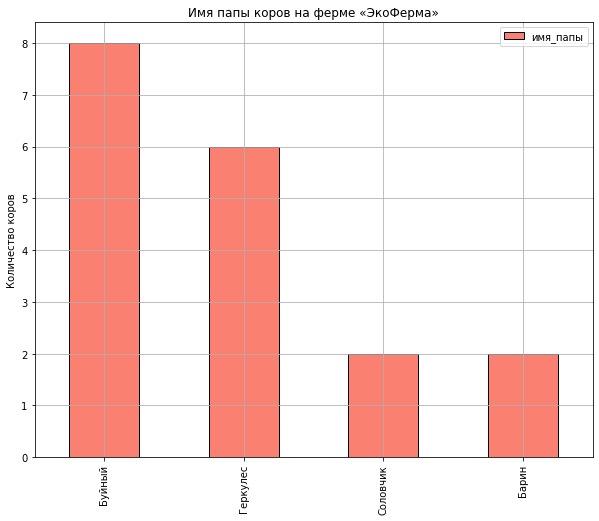

In [69]:
cow_buy['имя_папы'].value_counts().plot.bar(figsize=(10, 8), ec='black', legend=True, grid=True, color='Salmon')
plt.title('Имя папы коров на ферме «ЭкоФерма»')
plt.ylabel('Количество коров')
plt.show()

In [70]:
cow_buy['имя_папы'].value_counts()

Буйный      8
Геркулес    6
Соловчик    2
Барин       2
Name: имя_папы, dtype: int64

Папа бык по кличке Буйный имеет больше всех детей(коров) в количестве 8, чуть меньше у быка Геркулес - 6, у быка Барин 2, у Соловчика 2. 

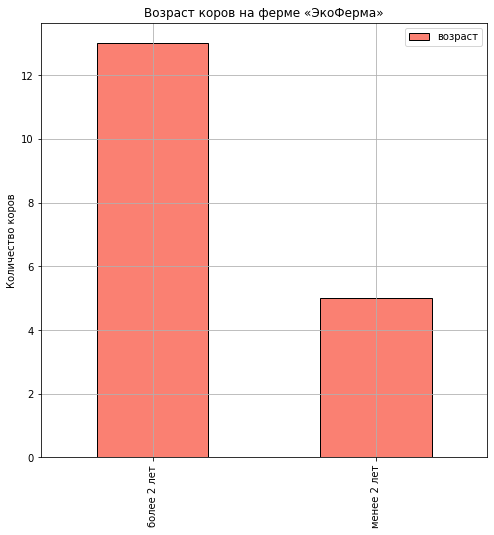

In [71]:
cow_buy['возраст'].value_counts().plot.bar(figsize=(8, 8), ec='black', legend=True, grid=True, color='Salmon')
plt.title('Возраст коров на ферме «ЭкоФерма»')
plt.ylabel('Количество коров')
plt.show()

In [72]:
cow_buy['возраст'].value_counts()

более 2 лет    13
менее 2 лет     5
Name: возраст, dtype: int64

На ферме 13 коров старше 2 лет, 5 коров младше.

# 4. Корреляционный анализ признаков в датасете ferma_main.

## 4.1 Изучим взаимосвязь между признаками: рассчитаем коэффициенты корреляции между всеми признаками.

Следуя из исследовательского анализа, количественные признаки распределены относительно нормально у параметра удой белок. Остальные признаки распределены ненормально. Посчитает коэффициенты корреляции Пирсона и Спирмена для всех признаков.

In [73]:
def coef_correlation(a, b):
    coef_pearson = a.corr(b)
    coef_spearman, p_value = stats.spearmanr(a,b)
    print("Коэффициент корреляции Пирсона:", coef_pearson)
    print("Коэффициент корреляции Спирмена:", coef_spearman)
    print("p_value:", p_value )

In [74]:
a = ferma_main['удой']
b = ferma_main['эке']
coef_correlation(a, b)

Коэффициент корреляции Пирсона: 0.7650977877344268
Коэффициент корреляции Спирмена: 0.7651443116006692
p_value: 8.359783320590403e-122


Коэффициент корреляции Пирсона достаточно высокий, показывает положительную линейную корреляцию между признаками удой и ЭКЕ.

In [75]:
a = ferma_main['удой']
b = ferma_main['сырой_протеин']
coef_correlation(a, b)

Коэффициент корреляции Пирсона: 0.4467312546088666
Коэффициент корреляции Спирмена: 0.43754251989802084
p_value: 9.395930002891475e-31


Коэффициенты корелляции Пирсона показывает слабую связь. Коэффициент Спирмена показывает слабую положительную корреляцию.

In [76]:
a = ferma_main['удой']
b = ferma_main['cпо']
coef_correlation(a, b)

Коэффициент корреляции Пирсона: 0.8063389252912262
Коэффициент корреляции Спирмена: 0.787904090851949
p_value: 6.236376891916343e-134


Несмотря на высокий коэффициент Пирсона в расчет брать его не стоит, так как распределение по гистограмме ненормальное. Коэффициент Спирмена показывает достаточно высокую положительную корреляцию. 

In [77]:
a = ferma_main['удой']
b = ferma_main['жирность']
coef_correlation(a, b)

Коэффициент корреляции Пирсона: 0.6009018484316156
Коэффициент корреляции Спирмена: 0.688505794761783
p_value: 2.1035311214189552e-89


Коэффициент Спирмена показывает положительную корреляцию, но не достаточно высокую.

In [78]:
a = ferma_main['удой']
b = ferma_main['белок']
coef_correlation(a, b)

Коэффициент корреляции Пирсона: 0.002965710114691232
Коэффициент корреляции Спирмена: -0.005700881383962722
p_value: 0.886621725204249


Из вывода видна очень слабая отрицательная корреляция, ее практически нет. Поскольку p-значение корреляции не меньше 0,05, корреляция не является статистически значимой. 

Теперь построим диаграммы всех признаков с учетом категориальных.

## 4.2 Диаграммы рассеивания для признаков удой и ЭКЕ с учётом значения категориальных признаков.

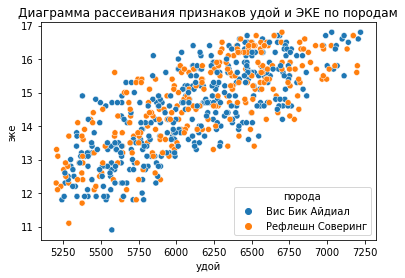

In [79]:
sns.scatterplot(data=ferma_main, x="удой", y="эке", hue = "порода");
plt.title('Диаграмма рассеивания признаков удой и ЭКЕ по породам');

Порода не влияет на ЭКЕ. У обеих пород чем выше ЭКЕ, тем выше удой.

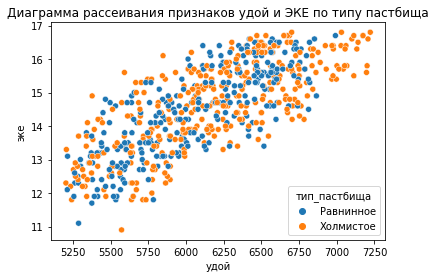

In [80]:
sns.scatterplot(data=ferma_main, x="удой", y="эке", hue = "тип_пастбища");
plt.title('Диаграмма рассеивания признаков удой и ЭКЕ по типу пастбища');

ЭКЕ не зависит от типа пастбища.

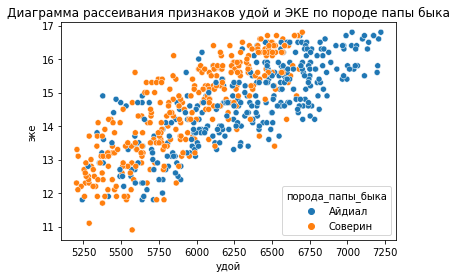

In [81]:
sns.scatterplot(data=ferma_main, x="удой", y="эке", hue = "порода_папы_быка");
plt.title('Диаграмма рассеивания признаков удой и ЭКЕ по породе папы быка');

Влияние породы папы быка наблюдается. Порода Айдиал - при увеличении ЭКЕ , увеличивается удой.

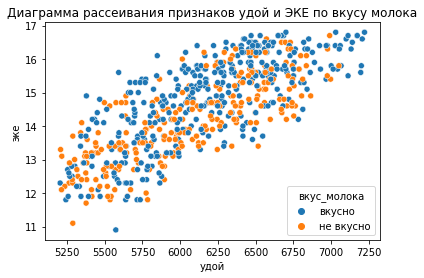

In [82]:
sns.scatterplot(data=ferma_main, x="удой", y="эке", hue = "вкус_молока");
plt.title('Диаграмма рассеивания признаков удой и ЭКЕ по вкусу молока');

Вкус молока не влияет.

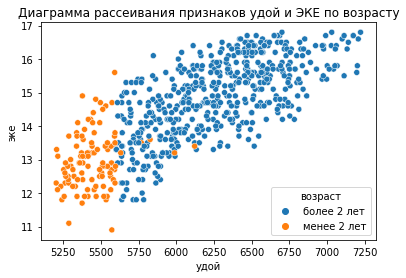

In [83]:
sns.scatterplot(data=ferma_main, x="удой", y="эке", hue = "возраст");
plt.title('Диаграмма рассеивания признаков удой и ЭКЕ по возрасту');

Возраст влияет на показатели. Коров  моложе 2х лет дают удои до 5600 кг. У коров старше 2х лет удои выше, при этом отслеживается зависимость ЭКЕ от удоев.

## 4.3 Диаграммы рассеивания для признаков удой и сырой протеин  с учётом значения категориальных признаков.

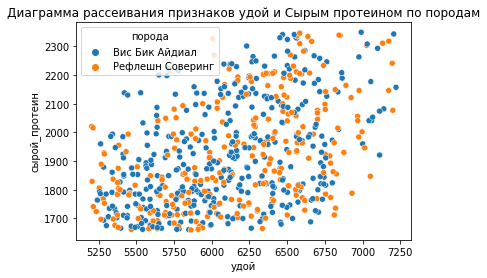

In [84]:
sns.scatterplot(data=ferma_main, x="удой", y="сырой_протеин", hue = "порода");
plt.title('Диаграмма рассеивания признаков удой и Сырым протеином по породам');

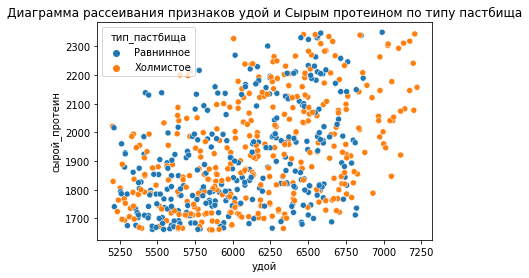

In [85]:
sns.scatterplot(data=ferma_main, x="удой", y="сырой_протеин", hue = "тип_пастбища");
plt.title('Диаграмма рассеивания признаков удой и Сырым протеином по типу пастбища');

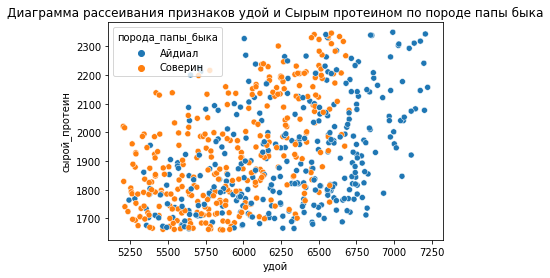

In [86]:
sns.scatterplot(data=ferma_main, x="удой", y="сырой_протеин", hue = "порода_папы_быка");
plt.title('Диаграмма рассеивания признаков удой и Сырым протеином по породе папы быка');

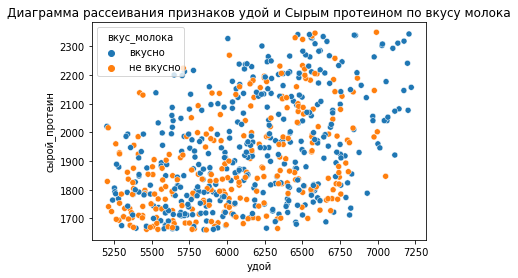

In [87]:
sns.scatterplot(data=ferma_main, x="удой", y="сырой_протеин", hue = "вкус_молока");
plt.title('Диаграмма рассеивания признаков удой и Сырым протеином по вкусу молока');

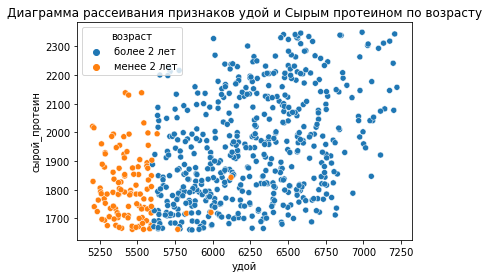

In [88]:
sns.scatterplot(data=ferma_main, x="удой", y="сырой_протеин", hue = "возраст");
plt.title('Диаграмма рассеивания признаков удой и Сырым протеином по возрасту');

Связть между удоем и сырым протеином слабая. Категориальные признаки также не оказывают влияние на удои при увеличении сырого протеина. 

## 4.4 Диаграммы рассеивания для признаков удой и СПО  с учётом значения категориальных признаков.

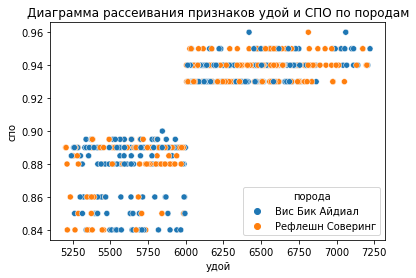

In [89]:
sns.scatterplot(data=ferma_main, x="удой", y="cпо", hue = "порода");
plt.title('Диаграмма рассеивания признаков удой и СПО по породам');

Порода не влияет на СПО и удой.

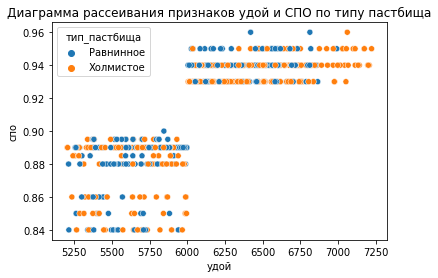

In [90]:
sns.scatterplot(data=ferma_main, x="удой", y="cпо", hue = "тип_пастбища");
plt.title('Диаграмма рассеивания признаков удой и СПО по типу пастбища');

При высоком СПО и типе пастбища холмистое удой выше.

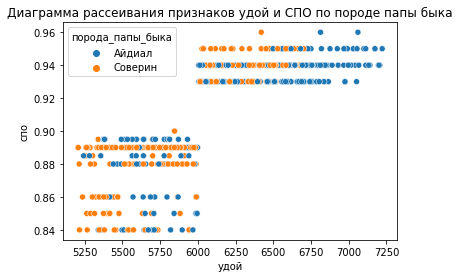

In [91]:
sns.scatterplot(data=ferma_main, x="удой", y="cпо", hue = "порода_папы_быка");
plt.title('Диаграмма рассеивания признаков удой и СПО по породе папы быка');

Коровы с высоким СПО и породой папы быка Айдиал дают более высокие удои.

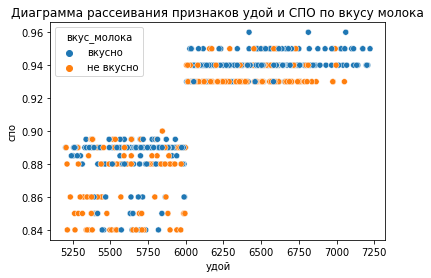

In [92]:
sns.scatterplot(data=ferma_main, x="удой", y="cпо", hue = "вкус_молока");
plt.title('Диаграмма рассеивания признаков удой и СПО по вкусу молока');

Молоко с высоким СПО более вкусное.

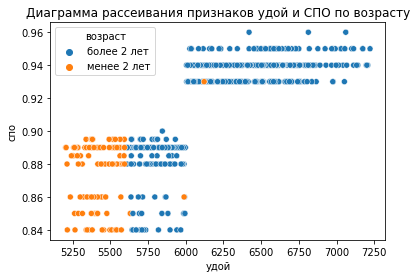

In [93]:
sns.scatterplot(data=ferma_main, x="удой", y="cпо", hue = "возраст");
plt.title('Диаграмма рассеивания признаков удой и СПО по возрасту');

У молодых коров СПО ниже, так же как и удой.

Как уже наблюдалось по гистограмме, зависимость удоев от СПО имеет ненормальное распределение, зависимость нелинейная. При этом мы можем наблюдает зависимость удоев от СПО:у коров, СПО которых находится в диапазоне от 0,84 до 0,90 дают удои до 6000 кг, коровы, СПО которых в диапазоне от 0,93 до 0,96, удои от 6000 кг и выше.
Стоит отметить, что у коров младше 2 лет СПО находится в диапазоне 0,84 до 0,90.

## 4.5 Диаграммы рассеивания для признаков удой и жирность  с учётом значения категориальных признаков.

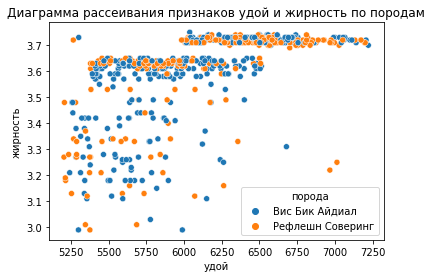

In [94]:
sns.scatterplot(data=ferma_main, x="удой", y="жирность", hue = "порода");
plt.title('Диаграмма рассеивания признаков удой и жирность по породам');

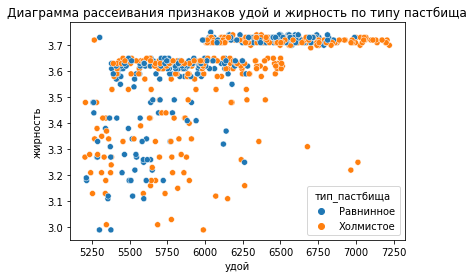

In [95]:
sns.scatterplot(data=ferma_main, x="удой", y="жирность", hue = "тип_пастбища");
plt.title('Диаграмма рассеивания признаков удой и жирность по типу пастбища');

В целом порода и тип пастбища не оказывает влияние на жирность и удой, но есть часть коров, с высокой жирностью, которые дают большие удои, гуляя на холмистых пастбищах.

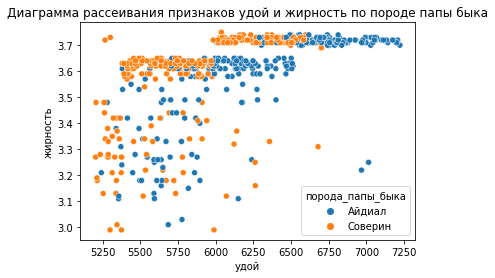

In [96]:
sns.scatterplot(data=ferma_main, x="удой", y="жирность", hue = "порода_папы_быка");
plt.title('Диаграмма рассеивания признаков удой и жирность по породе папы быка');

Порода папы быка имеел влияние. Так, при высокой жирности у коровы, чей папа порода Айдиал, вероянее даст больший удой, чем та корова, у которой папа породы Соверин.

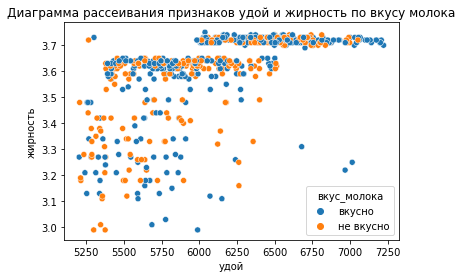

In [97]:
sns.scatterplot(data=ferma_main, x="удой", y="жирность", hue = "вкус_молока");
plt.title('Диаграмма рассеивания признаков удой и жирность по вкусу молока');

Вкус молока не влияет на признаки удой и жирность.

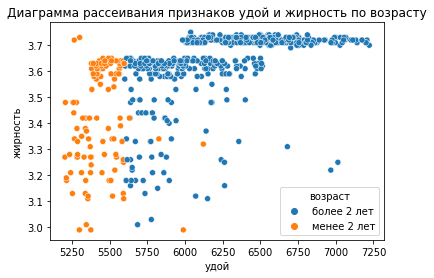

In [98]:
sns.scatterplot(data=ferma_main, x="удой", y="жирность", hue = "возраст");
plt.title('Диаграмма рассеивания признаков удой и жирность по возрасту');

У коров старше двух лет жирность выше, но есть и молодые коровы, жирность которых доходит до 3,7%. 

В целом зависимость удоя до жирность умеренная: чем выше жирность, тем больше удой.

## 4.6 Диаграммы рассеивания для признаков удой и белок с учётом значения категориальных признаков.

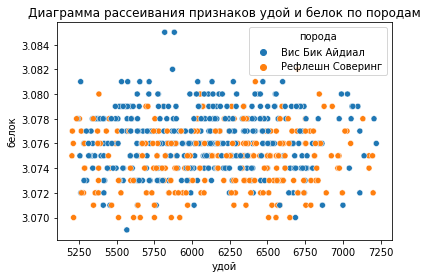

In [99]:
sns.scatterplot(data=ferma_main, x="удой", y="белок", hue = "порода");
plt.title('Диаграмма рассеивания признаков удой и белок по породам');

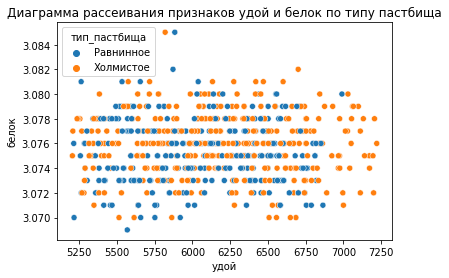

In [100]:
sns.scatterplot(data=ferma_main, x="удой", y="белок", hue = "тип_пастбища");
plt.title('Диаграмма рассеивания признаков удой и белок по типу пастбища');

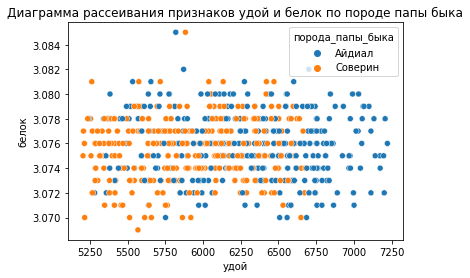

In [101]:
sns.scatterplot(data=ferma_main, x="удой", y="белок", hue = "порода_папы_быка");
plt.title('Диаграмма рассеивания признаков удой и белок по породе папы быка');

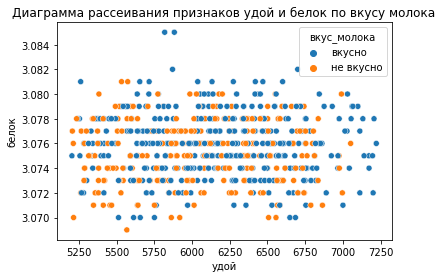

In [102]:
sns.scatterplot(data=ferma_main, x="удой", y="белок", hue = "вкус_молока");
plt.title('Диаграмма рассеивания признаков удой и белок по вкусу молока');

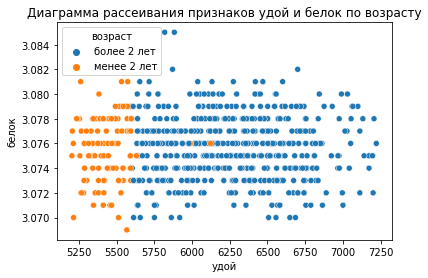

In [103]:
sns.scatterplot(data=ferma_main, x="удой", y="белок", hue = "возраст");
plt.title('Диаграмма рассеивания признаков удой и белок по возрасту');

Содержание белка не влияет на удой.

**Вывод:**

1. Целевой признак удой положительно коррелирует с ЭКЕ. Также наблюдается корреляция с СПО и сырым протеином.
2. Целевой признак удой нелинейную связь со всеми признаками. 
3. Мультиколинеарность не наблюдается. 

Для построения модели необходимо учитывать следующие количественные признаки:
- ЭКЕ - чем выше ЭКЕ тем больше удой
- сырой протеин- хоть зависимость слабая, но она есть
- СПО - при более высоком СПО, удои выше


# 5. Обучение модели линейной регрессии.

## 5.1 Первая модель.

Подготовим данные датасета ferma_main  и обучим на них первую модель LinearRegression. 

Используем в качестве целевого признак Удой, кг.Разделим данные на тренировочную и тестовую выборки.

In [104]:
RANDOM_STATE = 42

X = ferma_main.drop('удой', axis=1)
y = ferma_main['удой']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471 entries, 508 to 103
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                471 non-null    int64  
 1   эке               471 non-null    float64
 2   сырой_протеин     471 non-null    int64  
 3   cпо               471 non-null    float64
 4   порода            471 non-null    object 
 5   тип_пастбища      471 non-null    object 
 6   порода_папы_быка  471 non-null    object 
 7   жирность          471 non-null    float64
 8   белок             471 non-null    float64
 9   вкус_молока       471 non-null    object 
 10  возраст           471 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 44.2+ KB


Отберем признаки - количественные и категориальные. 

Кодируем категориальные признаки с помощью OneHotEncoder. Масштабируем количественные признаки с помощью StandardScaler.

In [105]:
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст']
num_col_names = ['эке', 'сырой_протеин', 'cпо']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()
encoder_col_names

array(['x0_Рефлешн Соверинг', 'x1_Холмистое', 'x2_Соверин',
       'x3_менее 2 лет'], dtype=object)

Создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных. Объединяем все преобразованные данные в тренировочный и тестовый датафреймы. Сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок. Обучаем модель линейной регрессии на подготовленных данных.

In [106]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

Оценим качество модели на тестовой выборке: рассчитаем R².

In [107]:
r2 = r2_score(y_test, predictions)  
f"R2 LinearRegression = {r2:.3f}"

'R2 LinearRegression = 0.784'

Проанализируем остатки с помощью графиков.

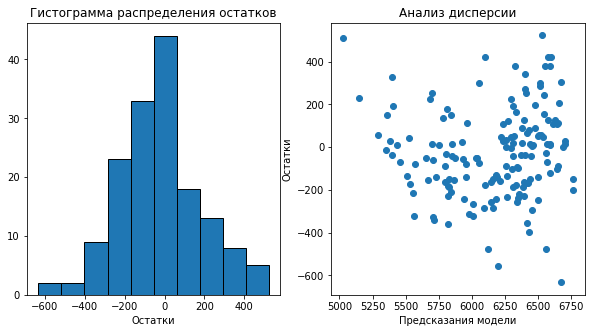

In [108]:
residuals = y_test-predictions

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals, bins=10, ec='black')
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

**Вывод:**  коэффициент детерминации R²= 0,784 ближе к единице, значит модель работает достаточно хорошо, но все же ошибается. Гистограмма распределния остатков почти не имеет смещения. Дисперсия больше похожа на постоянную. Все это говорит о том, что качество модели относительно хорошее, но можно попробовать ее улучшить.


## 5.2 Вторая модель.

Подготовим данные с учётом связи входных признаков с целевым и обучите на них вторую модель LinearRegression.

Как уже было обнаружено, СПО и Удой связаны нелинейно. На их диаграмме рассеяния наблюдения сгруппированы в два кластера, причём значение СПО= 0,90 можно считать границей между кластерами. Чтобы устранить нелинейность, преобразуем СПО в категориальный бинарный признак, использовав эту границу.

In [109]:
def cpo_cat_bin(cпо):
    try:
        if cпо < 0.915:
            return 0
        elif cпо >= 0.915:
            return 1
    except:
        pas

ferma_main['cпо_категориальное'] = ferma_main['cпо'].apply(cpo_cat_bin)

ferma_main.head()

,id,удой,эке,сырой_протеин,cпо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,cпо_категориальное
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более 2 лет,0
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее 2 лет,0
2,3,5810,14.0,1854,0.885,Рефлешн Соверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более 2 лет,0
3,4,5895,12.4,2012,0.885,Рефлешн Соверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более 2 лет,0
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее 2 лет,0


ЭКЕ и Удой также связаны нелинейно. Чтобы исключить нелинейность между ними, введем новый признак ЭКЕ в квадрате.

In [110]:
ferma_main['эке_в_квадрате'] = ferma_main['эке']**2

In [111]:
ferma_main.head()

,id,удой,эке,сырой_протеин,cпо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,cпо_категориальное,эке_в_квадрате
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более 2 лет,0,201.64
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее 2 лет,0,163.84
2,3,5810,14.0,1854,0.885,Рефлешн Соверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более 2 лет,0,196.00
3,4,5895,12.4,2012,0.885,Рефлешн Соверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более 2 лет,0,153.76
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее 2 лет,0,163.84


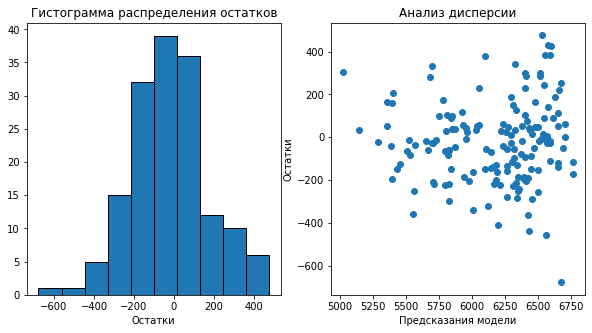

In [112]:
RANDOM_STATE = 42

X = ferma_main.drop('удой', axis=1)
y = ferma_main['удой']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)

cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'cпо_категориальное']
num_col_names = ['эке_в_квадрате', 'сырой_протеин']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions1 = model_lr.predict(X_test)

residuals = y_test-predictions1

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals, bins=10, ec='black')
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

In [113]:
r2 = r2_score(y_test, predictions1)  
f"R2 LinearRegression = {r2:.3f}"

'R2 LinearRegression = 0.818'

**Вывод:**  коэффициент детерминации данной модели увеличился R²= 0,818, значит модель работает лучше, чем предыдущая. Гистограмма распределения и дисперсия также выглядит лучше предыдущих. В целом, данная модель меньше ошибается, чем предыдущая.

## 5.3 Третья модель.

Добавим в данные новый признак Имя папы из файла ferma_dad.csv и обучите на них третью модель LinearRegression.

In [114]:
ferma_main_dad = ferma_main.merge(ferma_dad, on='id', how='inner')

ferma_main_dad.head()

,id,удой,эке,сырой_протеин,cпо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,cпо_категориальное,эке_в_квадрате,имя_папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более 2 лет,0,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее 2 лет,0,163.84,Соловчик
2,3,5810,14.0,1854,0.885,Рефлешн Соверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более 2 лет,0,196.00,Барин
3,4,5895,12.4,2012,0.885,Рефлешн Соверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более 2 лет,0,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее 2 лет,0,163.84,Барин


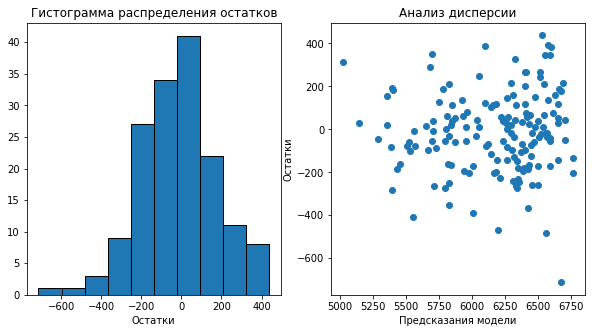

In [115]:
RANDOM_STATE = 42

X = ferma_main_dad.drop('удой', axis=1)
y = ferma_main_dad['удой']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)

cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'cпо_категориальное', 'имя_папы']
num_col_names = ['эке_в_квадрате', 'сырой_протеин']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions2 = model_lr.predict(X_test)

residuals = y_test-predictions2

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals, bins=10, ec='black')
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

In [116]:
r2 = r2_score(y_test, predictions2)  
f"R2 LinearRegression = {r2:.3f}"

'R2 LinearRegression = 0.825'

**Вывод:** Сравнивая коэффициеты детерминации трех моделей: модель 1 R²= 0,784, модель 2 R²= 0,818, модель 3 R²= 0,825, можно сделать вывод, что модель 3 хорошо себя показывет в 83% случаев. Гистограмма распределения остатков модель 3 в наименьшей степени имеет смещение. По дисперсии - модель 2 и модель 3 почти не отличаются. 


## 5.4 Оценим качество каждой модели по трём метрикам: MSE, MAE, RMSE.

In [117]:
def metrics(a,b):
    mse = mean_squared_error(a, b)
    mae = mean_absolute_error(a, b)
    rmse = np.sqrt(mse)
    print(f"MSE = {mse:.0f}", f"MAE = {mae:.0f}", f"RMSE = {rmse:.0f}")

Метрики модель 1.

In [118]:
metrics(y_test, predictions)

MSE = 43887 MAE = 164 RMSE = 209


Метрики модель 2.

In [119]:
metrics(y_test, predictions1)

MSE = 37031 MAE = 149 RMSE = 192


Метрики модель 3.

In [120]:
metrics(y_test, predictions2)

MSE = 35674 MAE = 146 RMSE = 189


По трем метрикам лучшая модель - модель 3. В модели 3 метрика MSE=35722- оценить сложно,так как измеряется в квадратных единицах целевого признака. Метрика МАЕ модели 3 показывает, что предсказание в среднем отличается от истинного значения на 146 кг. Метрика RMSE модели 3 показывает, что в среднем предсказание отличается от истинного значения на 189 кг.

Укажим доверительный интервал прогноза лучшей модели. Для этого рассчитаем квантили ошибки модели.

In [121]:
np.quantile(predictions2, [0.025, 0.975])

array([5351.31828057, 6749.07762864])

In [122]:
st.norm.interval(0.95, loc=np.mean(predictions2), scale=st.sem(predictions2))

(6092.340075854289, 6221.375070058381)

С вероятностью 95% предсказываемое значение будет находится в полученном интервале 6091-6220. 


## 5.5 Прогноз удоя коров на ферме "ЭкоФерма" с помощью модели 3.

Добавим недостающие признаки ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение): возьмем из датасета ferma_main средние значения каждого из признаков и увеличим их на 5%.

In [123]:
df_cow_buy = cow_buy[cow_buy.columns]
df_cow_buy.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее 2 лет
2,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,более 2 лет
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более 2 лет
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более 2 лет


In [124]:
df_cow_buy['эке_в_квадрате'] = ferma_main['эке_в_квадрате'].mean()*1.05
df_cow_buy['сырой_протеин'] = ferma_main['сырой_протеин'].mean()*1.05
df_cow_buy['cпо'] = ferma_main['cпо'].mean()*1.05
df_cow_buy['cпо_категориальное'] = df_cow_buy['cпо'].apply(cpo_cat_bin)

In [125]:
df_cow_buy.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,эке_в_квадрате,сырой_протеин,cпо,cпо_категориальное
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет,224.025225,2019.947532,0.958744,1
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее 2 лет,224.025225,2019.947532,0.958744,1
2,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,более 2 лет,224.025225,2019.947532,0.958744,1
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более 2 лет,224.025225,2019.947532,0.958744,1
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более 2 лет,224.025225,2019.947532,0.958744,1


In [126]:
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'cпо_категориальное', 'имя_папы']
num_col_names = ['эке_в_квадрате', 'сырой_протеин']


df_cow_buy_scaled = scaler.transform(df_cow_buy[num_col_names])

df_cow_buy_ohe = encoder.transform(df_cow_buy[cat_col_names])
encoder_col_names = encoder.get_feature_names()

X_test_scaled = pd.DataFrame(df_cow_buy_scaled, columns=num_col_names)
X_test_ohe = pd.DataFrame(df_cow_buy_ohe, columns=encoder_col_names)

X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

df_cow_buy_predictions = model_lr.predict(X_test)


In [127]:
df_cow_buy['удой'] = df_cow_buy_predictions
df_cow_buy.head(20)

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,эке_в_квадрате,сырой_протеин,cпо,cпо_категориальное,удой
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет,224.025225,2019.947532,0.958744,1,6569.542943
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее 2 лет,224.025225,2019.947532,0.958744,1,6338.334675
2,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,более 2 лет,224.025225,2019.947532,0.958744,1,6243.623422
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более 2 лет,224.025225,2019.947532,0.958744,1,6552.713023
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более 2 лет,224.025225,2019.947532,0.958744,1,6501.769713
5,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее 2 лет,224.025225,2019.947532,0.958744,1,6385.003864
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет,224.025225,2019.947532,0.958744,1,6569.542943
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более 2 лет,224.025225,2019.947532,0.958744,1,6530.883383
9,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее 2 лет,224.025225,2019.947532,0.958744,1,6360.164314
10,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,более 2 лет,224.025225,2019.947532,0.958744,1,6304.331506


Как видим, модель 3 предсказывает, что все коровы из "ЭкоФермы" будут давать удои от 6000 кг в год.

**Вывод** Лучшей модель оказалась модель 3, коэффициет детерминации которой R²= 0,825, то есть модель хорошо себя показывет в 83% случаев. Метрика RMSE модели показывает, что в среднем предсказание отличается от истинного значения на 189 кг. На данной модели спрогнозивароли удой коров на ферме "ЭкоФерма". По прогнозу все коровы дадут удой больше 6000 кг в год. 

# 6. Задачи классификации. 

## 6.1 Обучение модели логистической регрессии.

Используем данные датасета ferma_main.csv и обучим на них модель LogisticRegression.
Используем в качестве целевого признака Вкус молока.

In [128]:
ferma_main.head()

,id,удой,эке,сырой_протеин,cпо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,cпо_категориальное,эке_в_квадрате
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более 2 лет,0,201.64
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее 2 лет,0,163.84
2,3,5810,14.0,1854,0.885,Рефлешн Соверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более 2 лет,0,196.00
3,4,5895,12.4,2012,0.885,Рефлешн Соверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более 2 лет,0,153.76
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее 2 лет,0,163.84


Преобразуйте Вкус молока в категориальный бинарный признак.

In [129]:
ferma_main['вкус_молока'] = ferma_main['вкус_молока'].apply(lambda x: 1 if x == 'вкусно' else 0)
ferma_main.head()

,id,удой,эке,сырой_протеин,cпо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,cпо_категориальное,эке_в_квадрате
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,1,более 2 лет,0,201.64
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,1,менее 2 лет,0,163.84
2,3,5810,14.0,1854,0.885,Рефлешн Соверинг,Холмистое,Соверин,3.59,3.074,0,более 2 лет,0,196.00
3,4,5895,12.4,2012,0.885,Рефлешн Соверинг,Холмистое,Айдиал,3.40,3.075,0,более 2 лет,0,153.76
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,1,менее 2 лет,0,163.84


Добавим признак Имя папы из датасета ferma_dad.

In [130]:
ferma_main = ferma_main.merge(ferma_dad, on='id', how='inner')
ferma_main.head()

,id,удой,эке,сырой_протеин,cпо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,cпо_категориальное,эке_в_квадрате,имя_папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,1,более 2 лет,0,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,1,менее 2 лет,0,163.84,Соловчик
2,3,5810,14.0,1854,0.885,Рефлешн Соверинг,Холмистое,Соверин,3.59,3.074,0,более 2 лет,0,196.00,Барин
3,4,5895,12.4,2012,0.885,Рефлешн Соверинг,Холмистое,Айдиал,3.40,3.075,0,более 2 лет,0,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,1,менее 2 лет,0,163.84,Барин


Разберем данные на тренировочную и тестовую выборки. Масштабируем и закодируем признаки.

In [131]:
RANDOM_STATE = 42

X = ferma_main.drop(columns=['вкус_молока'])
y = ferma_main['вкус_молока']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)

cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'cпо_категориальное', 'имя_папы']
num_col_names = ['эке_в_квадрате', 'сырой_протеин', 'жирность', 'белок']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)


Обучим модель логистической регрессии на подготовленных данных.

In [132]:
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Рассчитаем метрики accuracy, recall, precision. Построим матрицу ошибок.

In [133]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print('accuracy: ',round(accuracy,3))
print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))

accuracy:  0.631
recall:  0.864
precision:  0.623


Метрика Accuracy показывает, что модель ошибается в 36,9% случаев.

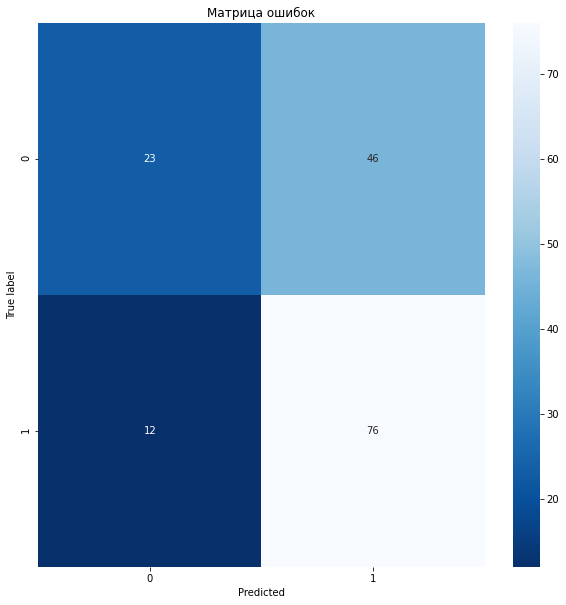

In [134]:
plt.figure(figsize = (10,10))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

## 6.2 Анализ модели логистической регрессии.

Метрика recall= 0.864 больше чем precision=0.623. Такая модель правильно определяет большинство Positive случаев, но имеет много ложных срабатываний (классификаций Negative выборок как Positive). В данном случае модель 46 раз ошибочно предсказывает, что молоко вкусное. Как мы помним, для фермера важен показатель вкус молока. Таким образом критичнее всего при покупке коров ошибка ложноположительная - ошибка первого рода.

Сведем критичную ошибку к нулю: для этого изменим порог принадлежности к классам.

In [135]:
y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

data.head() 

,y_valid,y_proba
85,1,0.861369
110,1,0.842813
66,1,0.841492
51,1,0.839685
8,1,0.817310


In [136]:
thresholds = [round(i,2) for i in np.linspace(0.5,1,num = 20,endpoint=False)]
print(thresholds)

[0.5, 0.52, 0.55, 0.57, 0.6, 0.62, 0.65, 0.68, 0.7, 0.72, 0.75, 0.78, 0.8, 0.82, 0.85, 0.88, 0.9, 0.92, 0.95, 0.98]


In [137]:
columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x>=i else 0)
    
data.sample(5)

,y_valid,y_proba,y_pred_0.5,y_pred_0.52,y_pred_0.55,y_pred_0.57,y_pred_0.6,y_pred_0.62,y_pred_0.65,y_pred_0.68,...,y_pred_0.75,y_pred_0.78,y_pred_0.8,y_pred_0.82,y_pred_0.85,y_pred_0.88,y_pred_0.9,y_pred_0.92,y_pred_0.95,y_pred_0.98
6,1,0.702828,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
26,1,0.384150,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151,0,0.726508,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
58,1,0.680671,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
91,1,0.645682,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
for i in thresholds:
    cm = confusion_matrix(y_test, data['y_pred_'+str(i)])
    if cm[0][1] == 0:
        print('Порог = ',i ,'Precision = ', round(precision_score(y_test, data['y_pred_'+str(i)]), 3))
        porog = i
        break

Порог =  0.85 Precision =  1.0


Получили порог 0,85. Еще раз рассчитаем метрики.

In [139]:
acc = accuracy_score(y_test, data['y_pred_'+str(porog)])
recall = recall_score(y_test, data['y_pred_'+str(porog)])
precision = precision_score(y_test, data['y_pred_'+str(porog)])

print('accuracy: ',round(accuracy,3))
print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))

accuracy:  0.631
recall:  0.011
precision:  1.0


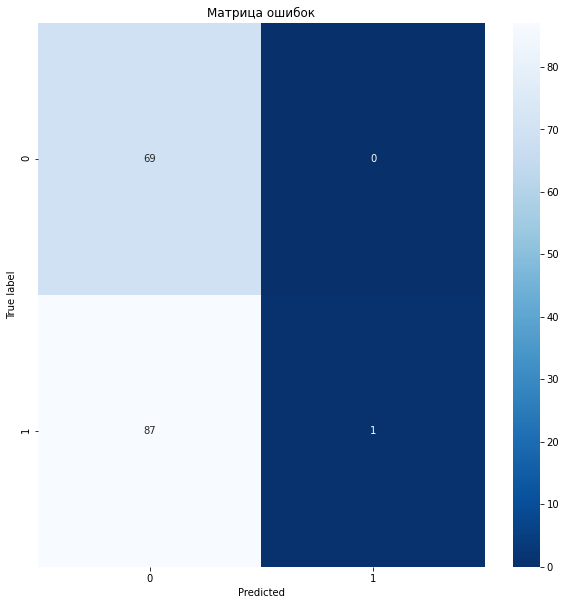

In [141]:
plt.figure(figsize = (10,10))
cm = confusion_matrix(y_test, data['y_pred_'+str(porog)])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');
plt.title('Матрица ошибок')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

Критическая ошибка первого рода сведена к нулю. Метрика precision = 1, метрика recall =0,011, метрика accuracy осталась прежней 0,631.

## 6.3 Прогноз вкуса молока коров, которых фермер хочет купить. 

С помощью обученной модели спрогнозируем вкус молока коров. 

In [142]:
df2_cow_buy = cow_buy[cow_buy.columns]
df2_cow_buy.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее 2 лет
2,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,более 2 лет
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более 2 лет
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более 2 лет


In [143]:
ferma_main_dad.head()

,id,удой,эке,сырой_протеин,cпо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,cпо_категориальное,эке_в_квадрате,имя_папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более 2 лет,0,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее 2 лет,0,163.84,Соловчик
2,3,5810,14.0,1854,0.885,Рефлешн Соверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более 2 лет,0,196.00,Барин
3,4,5895,12.4,2012,0.885,Рефлешн Соверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более 2 лет,0,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее 2 лет,0,163.84,Барин


Добавим признаки новые признаки.

In [144]:
df2_cow_buy['эке_в_квадрате'] = ferma_main_dad['эке_в_квадрате']
df2_cow_buy['сырой_протеин'] = ferma_main_dad['сырой_протеин']
df2_cow_buy['cпо_категориальное'] = ferma_main_dad['cпо_категориальное']
df2_cow_buy['cпо'] = ferma_main_dad['cпо']
df2_cow_buy.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,эке_в_квадрате,сырой_протеин,cпо_категориальное,cпо
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет,201.64,1743,0,0.890
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее 2 лет,163.84,2138,0,0.890
2,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,более 2 лет,196.00,1854,0,0.885
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более 2 лет,153.76,2012,0,0.885
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более 2 лет,163.84,1675,0,0.885


Спрогнозируем вкус молока с учетом порого 0,86.

In [145]:
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'cпо_категориальное', 'имя_папы']
num_col_names = ['эке_в_квадрате', 'сырой_протеин', 'жирность', 'белок']


df2_cow_buy_scaled = scaler.transform(df2_cow_buy[num_col_names])

df2_cow_buy_ohe = encoder.transform(df2_cow_buy[cat_col_names])
encoder_col_names = encoder.get_feature_names()

X_test_scaled = pd.DataFrame(df2_cow_buy_scaled, columns=num_col_names)
X_test_ohe = pd.DataFrame(df2_cow_buy_ohe, columns=encoder_col_names)

X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

df2_cow_buy_predictions = clf.predict_proba(X_test)[:,1]

df2_cow_buy['y_pred'] = df2_cow_buy_predictions

df2_cow_buy['вкус_молока'] = df2_cow_buy['y_pred'].apply(lambda x: 'вкусно' if x >= 0.65 else 'не вкусно')      

df2_cow_buy = df2_cow_buy.sort_values(by = ['y_pred'])
df2_cow_buy = df2_cow_buy.drop(columns='y_pred') 

df2_cow_buy.head(20)

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,эке_в_квадрате,сырой_протеин,cпо_категориальное,cпо,вкус_молока
5,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее 2 лет,161.29,1806,0,0.885,не вкусно
10,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,более 2 лет,187.69,1678,0,0.895,не вкусно
12,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.68,3.046,более 2 лет,237.16,2193,1,0.930,не вкусно
17,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.77,3.053,менее 2 лет,246.49,2159,1,0.930,не вкусно
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более 2 лет,153.76,2012,0,0.885,не вкусно
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более 2 лет,163.84,1675,0,0.885,не вкусно
18,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.34,3.069,более 2 лет,204.49,1759,0,0.895,не вкусно
15,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.065,более 2 лет,243.36,1747,1,0.930,не вкусно
13,Вис Бик Айдиал,Холмистое,Соверин,Барин,3.42,3.075,менее 2 лет,210.25,1766,1,0.930,не вкусно
16,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.079,более 2 лет,153.76,1873,0,0.895,не вкусно


Оказалось, что при пороге о,85 нет ни одной коровы, которая по прогнозу будет давать вкусное молоко. В результате порог был снижен до 0,65, при котором модель спрогнозировала три коровы с вкусным молоком.

# 7. Итоговые выводы.

Добавим прогнозы вкуса молока и удоя коров «ЭкоФермы» в датафрейм.

In [146]:
df2_cow_buy['удой'] = df_cow_buy['удой']

df2_cow_buy.head(20)

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,эке_в_квадрате,сырой_протеин,cпо_категориальное,cпо,вкус_молока,удой
5,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее 2 лет,161.29,1806,0,0.885,не вкусно,6385.003864
10,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,более 2 лет,187.69,1678,0,0.895,не вкусно,6304.331506
12,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.68,3.046,более 2 лет,237.16,2193,1,0.930,не вкусно,6569.542943
17,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.77,3.053,менее 2 лет,246.49,2159,1,0.930,не вкусно,6385.003864
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более 2 лет,153.76,2012,0,0.885,не вкусно,6552.713023
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более 2 лет,163.84,1675,0,0.885,не вкусно,6501.769713
18,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.34,3.069,более 2 лет,204.49,1759,0,0.895,не вкусно,6530.883383
15,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.065,более 2 лет,243.36,1747,1,0.930,не вкусно,6552.713023
13,Вис Бик Айдиал,Холмистое,Соверин,Барин,3.42,3.075,менее 2 лет,210.25,1766,1,0.930,не вкусно,6087.098389
16,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.079,более 2 лет,153.76,1873,0,0.895,не вкусно,6304.331506


По полученным данным фермеру стоит рассмотреть к покупке 3х коров под номерами 0,9,11. Прогнозируется, что их молоко будет вкусным и удои будут больше 6000 кг в год. 

**Итоги:**

Было дано три датасета:

- ferma_main.csv
- ferma_dad.csv
- cow_buy.csv

Обработали данные:

- изменили названия колонок
- изменили тип данных
- нашли, удалили и обработали явные и неявные дубликаты
- пропуски не обнаружили.

Провели исследовательский анализ трех датасетов:

- в датасете ferma_main обнаружили выброс, который был удален.

Проверили корреляционый анализ по всем признакам, выявили :

- целевой признак удой положительно коррелирует с ЭКЕ. Также наблюдается корреляция с СПО и сырым протеином.
- целевой признак удой нелинейную связь со всеми признаками. 
- мультиколинеарность не наблюдается. 
Для построения модели выделили следующие признаки, которые нужно было учитывать: 
- ЭКЕ - чем выше ЭКЕ тем больше удой
- сырой протеин- хоть зависимость слабая, но она есть
- СПО - несмотря на нелинейную зависимость, при более высоком СПО, удои выше

Обучили три модели линейной регрессии. Отобрали лучшую модель 3. Предсказали удой и вкус молока.

Для улучшения качества регрессионной модели мы воспользовались добавлением новых признаков:

- перевели СПО (Сахаро-протеиновое соотношение) в категориальный бинарный признак. 
- признак ЭКЕ возвели в квадрат.
- ввели признак Имя папы. Данная модель показала максимальную точность.

Для линейной регрессии мы использовали метрику коэффициеты детерминации R², которая показала, что в 83% случаев предсказание модели 3 точнее, чем среднее значение целевого признака. Также использовали другие метрики: метрика MSE=35722- оценить было сложно,так как измеряется в квадратных единицах целевого признака. Метрика МАЕ показала, что предсказание в среднем отличается от истинного значения на 146 кг. Метрика RMSE показала, что в среднем предсказание отличается от истинного значения на 189 кг.
Для логической регрессии мы выбирали между recall и precision/ Метрика recall= 0.864 оказалась больше чем precision=0.623.Нам было важен признак вкус молока. Поэтому была отобрана ошибка первого рода. 

В целом каждую метрику нужно рассматривать отдельно в закисимости от имеющихся данных, например, если есть выбросы, то метрики MSE и RMSE могут быть увеличены. В случае с логической регрессией - необходимо оценить критичность ошибки, исходя из этого выбирать метрику. 

**Рекомендации фермеру:**

Фермеру стоит рассмотреть к покупке все 3 коровы под номерами 0,9,11. Прогнозируется, что их молоко будет вкусным и удои будут больше 6000 кг в год. 


Возможно ли ещё улучшить результаты данной регрессионной модели - скорее всего можно. Так на показатель вкус молока влияей кислотность, плотность, степень чистоты. 
